Data Mining: Basic Concepts - Winter 2023/24
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Maximilian T. Fischer, Frederik Dennig, Yannick Metz, Udo Schlegel
```
__Organize in teams of 2 people, return the exercise on time using ILIAS__

---

Assignment 03 in Python
---------------
- ___Please put your names and student IDs here___:
    - _Name_, _Student ID_
    - _Name_, _Student ID_

---

#### Exercise 1: PCA

We want to apply the principal component analysis (PCA) to the following ``numpy.array`` data. Continue with the following steps in order to calculate the PCA manually. Do not use any libraries for this task. You may however use any ``numpy`` and ``pandas`` method.

<Axes: >

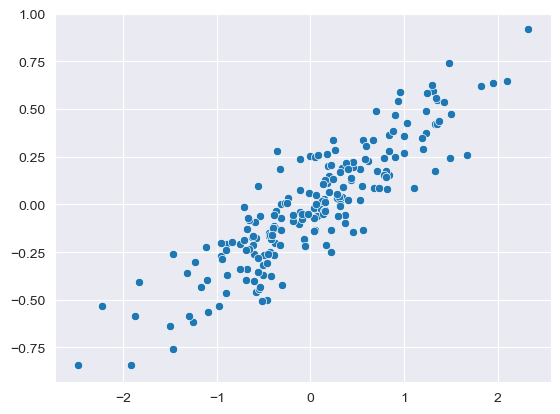

In [133]:
import numpy as np
import seaborn as sns
from sklearn import datasets

reg = np.random.RandomState(1)
arr = np.dot(reg.rand(2, 2), reg.randn(2, 200)).T
sns.scatterplot(x = arr[:,0], y = arr[:,1] )

##### __(a) Subtract the mean of the attributes__

In [134]:
arr[:, 0] = arr[:, 0] - np.mean(arr[:, 0])
arr[:, 1] = arr[:, 1] - np.mean(arr[:, 1])

##### __(b) Compute the covariance matrix__ _(Hint: use ``numpy.cov()``)_

In [135]:
cov = np.cov(arr, rowvar=False)
cov

array([[0.68217761, 0.23093475],
       [0.23093475, 0.09883179]])

##### __(c) Determine the eigenvalues/eigenvectors of the matrix__ _(Hint: use ``numpy.linalg.eig()``)_

In [136]:
eigenvalues, eigenvectors = np.linalg.eig(cov)

##### __(d) Transform the data using the eigenvectors and plot the result.__

[Text(0.5, 0, 'PC1'), Text(0, 0.5, 'PC2')]

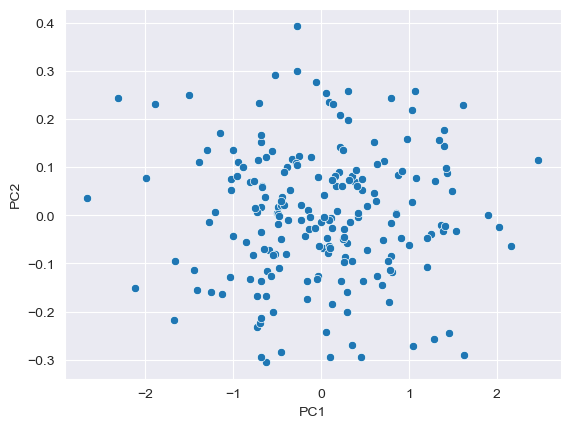

In [137]:
transformed = arr.dot(eigenvectors)

ax = sns.scatterplot(x=transformed[:, 0], y=transformed[:, 1])
ax.set(xlabel="PC1", ylabel="PC2")

##### __(e) Name the percentage of the data variance that the first principle component already covers. (Calculate the ratio between the first eigenvalue and the sum of all eigenvalues)__

In [138]:
eigenvalues[0] / sum(eigenvalues)

0.9763410074208768

##### __(f) Imagine you have a dataset with 5 attributes. How many Eigenvalues would you get during step c?__

```
> Your answer.
```

---

#### Exercise 2: Linear Interpolation
Given the following dataset: 

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.DataFrame(np.array([[1, 3], [3, 8], [5, 16]]), columns=['time', 'temperature'])
df

,time,temperature
0,1,3
1,3,8
2,5,16


##### __(a) Implement a method that takes any non-existing hour of the day (x) in the dataset (e.g., x = 4) between two existing values and gives the corresponding Temperature (y). Use linear interpolation for that (see formula below).__ 

$ y = y_1 + (y_2 - y_1) * \frac{x - x_1}{x_2 - x_1}$

_(Hint: x and y are the values you are looking for to fill any non-existing pair of time and corresponding temperature. The other elements in the formula you should get from the existing data.)_

In [140]:
def interpolate_temp(x: int) -> int:
    x_1 = x - 1
    x_2 = x + 1

    y_1 = df[df["time"] == x_1].temperature.iloc[0]
    y_2 = df[df["time"] == x_2].temperature.iloc[0]

    return y_1 + (y_2 - y_1) * (x - x_1) / (x_2 - x_1)

In [141]:
[interpolate_temp(x) for x in [2, 4]] # looks plausible

[5.5, 12.0]

##### __(b)  Use your method from (a) to interpolate and create new data points for ``x = 2`` and ``x = 4``. Visualize in a scatter plot the provided dataset and the two new data points you just created.__

In [142]:
to_append = pd.DataFrame([
    {"time": 2, "temperature": interpolate_temp(2)}, 
    {"time": 4, "temperature": interpolate_temp(4)}
])

df = pd.concat([df, to_append])
df

,time,temperature
0,1,3.0
1,3,8.0
2,5,16.0
0,2,5.5
1,4,12.0


<Axes: xlabel='time', ylabel='temperature'>

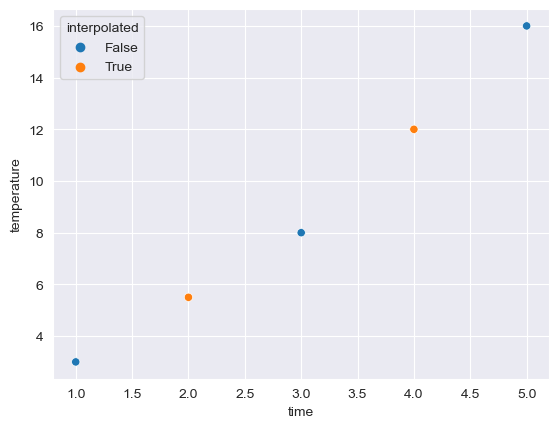

In [143]:
df["interpolated"] = [True if time in [2, 4] else False for time in df["time"]]
sns.scatterplot(x="time", y="temperature", hue="interpolated", data=df)

---

#### Exercise 3: Sampling Strategies

Please install `sklearn` for the following exercise.

In [144]:
import numpy as np
from sklearn.utils import resample

y = np.random.choice([0,1],size=1000, p=[.2,.8])
y

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,

##### __(a) Apply random sampling and select `10` elements from the array `y`.__ _(Use the method `np.random.choice`)_

In [145]:
np.random.choice(y, 10)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

##### __(b) Resample the array `y` with the `resample` method and extract `10` samples. Sample the data in stratified fashion.__

In [146]:
resample(y, n_samples=10, stratify=y)

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

Or did you mean this (I think so since it makes the difference to `(a)` more apparent):

In [147]:
for i in range(1, 11):
    arr = resample(y, n_samples=10, stratify=y)
    print(f"{arr}\t 0s: {len(arr[arr == 0])}, 1s: {len(arr[arr == 1])}")

[0 1 1 1 1 1 1 0 1 1]	 0s: 2, 1s: 8
[1 1 1 0 0 1 1 1 1 1]	 0s: 2, 1s: 8
[0 1 1 1 1 0 1 1 1 1]	 0s: 2, 1s: 8
[1 1 1 1 0 0 1 1 1 1]	 0s: 2, 1s: 8
[1 1 0 0 1 1 1 1 1 1]	 0s: 2, 1s: 8
[1 1 1 1 0 1 1 0 1 1]	 0s: 2, 1s: 8
[1 1 1 1 1 1 1 0 1 0]	 0s: 2, 1s: 8
[1 1 0 1 1 1 1 0 1 1]	 0s: 2, 1s: 8
[1 1 1 1 0 1 0 1 1 1]	 0s: 2, 1s: 8
[0 0 1 1 1 1 1 1 1 1]	 0s: 2, 1s: 8


##### __(c) Explain the difference between the applied methods and the results in `(a)` and `(b)`__

```
> Your answer.
```

If we resample the array with stratification, the proportion between the different values (0, 1) always remains the same. 0s will always be 20% of the resulting array, while 1s will make up 80% (those were also the proportions specified when creating the array; you can see above that for 10 values we always get 2 0s and 8 1s). The array in `(a)`, however, returns completely random values with irregular proportions:

In [148]:
for i in range(1, 11):
    arr = np.random.choice(y, 10)
    print(f"{arr}\t 0s: {len(arr[arr == 0])}, 1s: {len(arr[arr == 1])}")

[1 1 1 1 1 1 0 1 1 1]	 0s: 1, 1s: 9
[1 1 0 1 0 1 1 1 1 1]	 0s: 2, 1s: 8
[0 1 1 1 1 0 0 1 0 1]	 0s: 4, 1s: 6
[1 1 1 1 1 0 0 0 1 1]	 0s: 3, 1s: 7
[1 1 0 1 1 1 1 1 1 1]	 0s: 1, 1s: 9
[0 1 1 1 1 1 1 1 0 1]	 0s: 2, 1s: 8
[1 1 1 1 1 0 1 0 1 1]	 0s: 2, 1s: 8
[1 1 1 0 0 1 0 0 0 1]	 0s: 5, 1s: 5
[1 1 1 1 1 1 1 1 1 1]	 0s: 0, 1s: 10
[1 1 1 1 1 0 1 0 1 1]	 0s: 2, 1s: 8


---

#### Exercise 4: Decision Tree
You need to decide whether an incoming E-Mail is spam or not. The following attributes are stored for each E-Mail: TimeZone, GeoLocation, SuspiciousSubject, SuspiciousBody.

|MsgID|TimeZone|GeoLocation|SuspiciousSubject|SuspiciousBody|Spam|
|-----|--------|-----------|-----------------|--------------|----|
|1|US|US|No|Yes|NoSpam|
|2|US|US|No|No|NoSpam|
|3|EU|US|No|Yes|Spam|
|4|AS|EU|No|Yes|Spam|
|5|AS|AS|Yes|Yes|Spam|
|6|AS|AS|Yes|No|NoSpam|
|7|EU|AS|Yes|No|Spam|
|8|US|EU|No|Yes|NoSpam|
|9|US|AS|Yes|Yes|Spam|
|10|AS|EU|Yes|Yes|Spam|
|11|US|EU|Yes|No|Spam|
|12|EU|EU|No|No|Spam|
|13|EU|US|Yes|Yes|Spam|
|14|AS|EU|No|No|NoSpam|

##### __Construct a decision tree based on the data of Table 2 by hand. Use the Information Gain as impurity measure. Multiple splits are allowed. If all records in one leave share the same class label, your tree has to terminate.__
__Comment on the steps you performed to create the decision tree. Show the results of your calculations and draw plot the final decision tree using.__ 

_(Hint: you can use the ``![](imagename.png)`` to include a image in a markdown cell. Use this to include the created or handdrawn plot of the decision tree. Do not forget to also upload the image in your final submission.)_

```
> Your answer.
```

|MsgID|TimeZone|GeoLocation|SuspiciousSubject|SuspiciousBody|Spam|
|-----|--------|-----------|-----------------|--------------|----|
|1|US|US|No|Yes|NoSpam|
|2|US|US|No|No|NoSpam|
|8|US|EU|No|Yes|NoSpam|
|9|US|AS|Yes|Yes|Spam|
|11|US|EU|Yes|No|Spam|

In [149]:
expected_information = (- 9/14 * np.log2(9/14)) + (-5/14 * np.log2(5/14)) # Expected Information for Class Spam
expected_information

0.9402859586706311

In [150]:
info_attribute_time_zone = (
    (5/14) * (- (2/5) * np.log2(2/5) - (3/5) * np.log2(3/5)) +
    (4/14) * (- (4/4) * np.log2(4/4)) +  # This term will be zero because p2=0/4
    (5/14) * (- (3/5) * np.log2(3/5) - (2/5) * np.log2(2/5))
)
information_gain_time_zone = (expected_information - info_attribute_time_zone)
information_gain_time_zone

0.24674981977443933

In [151]:
info_attribute_geo_loation =  (
    (4/14) * (- (2/4) * np.log2(2/4) - (2/4) * np.log2(2/4)) +
    (6/14) * (- (4/6) * np.log2(4/6) - (2/6) * np.log2(2/6)) +
    (4/14) * (- (3/4) * np.log2(3/4) - (1/4) * np.log2(1/4))
)

information_gain_geo_loation = (expected_information - info_attribute_geo_loation)
information_gain_geo_loation

0.02922256565895487

In [152]:
info_suspicious_subject = (
    (7/14) * (- (3/7) * np.log2(3/7) - (4/7) * np.log2(4/7)) +
    (7/14) * (- (6/7) * np.log2(6/7) - (1/7) * np.log2(1/7))
)

information_gain_suspicious_subject = (expected_information - info_suspicious_subject)
information_gain_suspicious_subject

0.15183550136234159

In [153]:
info_suspicious_body = (
    (6/14) * (- (3/6) * np.log2(3/6) - (3/6) * np.log2(3/6)) +
    (8/14) * (- (6/8) * np.log2(6/8) - (2/8) * np.log2(2/8))
)
information_gain_suspicious_body = (expected_information - info_suspicious_body)
information_gain_suspicious_body

0.04812703040826949

## -> Best subject to split on first is Time Zone

### Looking at the Subset of US after the first Split:


|MsgID|TimeZone|GeoLocation|SuspiciousSubject|SuspiciousBody|Spam|
|-----|--------|-----------|-----------------|--------------|----|
|1|US|US|No|Yes|NoSpam|
|2|US|US|No|No|NoSpam|
|8|US|EU|No|Yes|NoSpam|
|9|US|AS|Yes|Yes|Spam|
|11|US|EU|Yes|No|Spam|

#### It's clear, that SuspiciousSubject now Yields the Highest Information Gain for the second Split in this Subset

### Looking at the Subset of AS after the first Split:


|MsgID|TimeZone|GeoLocation|SuspiciousSubject|SuspiciousBody|Spam|
|-----|--------|-----------|-----------------|--------------|----|
|4|AS|EU|No|Yes|Spam|
|5|AS|AS|Yes|Yes|Spam|
|6|AS|AS|Yes|No|NoSpam|
|10|AS|EU|Yes|Yes|Spam|
|14|AS|EU|No|No|NoSpam|

#### It's clear, that SuspiciousBody now Yields the Highest Information Gain for the second Split in this Subset

![](decision_tree.png)

---

#### Exercise 5: Decision Tree in Python
In this task we will train and display a decision tree for the ``iris.csv``data in Python. Only use the already imported packages. 

The classes of the flowers are mapped to numbers as follows: ``Iris-Setosa = 0``, ``Iris-Versicolour = 1``, ``Iris-Virginica = 2``

In [154]:
import pandas as pd 
from sklearn import tree

##### __(a) Create a decision tree using the information gain and train the decision tree with the iris data. Use the ``species`` column as the target variable__ 

##### __(b) Display the decision tree from (a). Explain the result in the following markdown cell.__ _(Hint: use the ``sklearn.tree.plot_tree`` or the ``sklearn.tree.export_graphviz`` method)_

```
> Your answer.
```

---